In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("F:\Python Classes\Algerian_forest_fires_dataset_cleaned.csv")

In [6]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [9]:
data.drop(['day','month','year'],axis=1,inplace = True)

In [10]:
data['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [12]:
data['Classes'] = np.where(data['Classes'].str.contains('not fire'),0,1)

In [14]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [16]:
data['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [17]:
## Independent and dependent features

X = data.drop(['FWI'],axis=1)
y = data['FWI']

In [18]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [19]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [20]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state= 42)

In [21]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((170, 11), (73, 11), (170,), (73,))

In [22]:
## Correlation on X_train

X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.640179,-0.295442,-0.303129,0.682819,0.495974,0.399434,0.608042,0.474804,0.528734,0.238873
RH,-0.640179,1.000000,0.201762,0.226259,-0.640759,-0.421517,-0.253547,-0.715106,-0.373155,-0.443073,-0.394121
Ws,-0.295442,0.201762,1.000000,0.244784,-0.169620,0.009523,0.092367,-0.004035,0.040699,-0.062718,-0.182236
Rain,-0.303129,0.226259,0.244784,1.000000,-0.536790,-0.288856,-0.304328,-0.341902,-0.300998,-0.367767,-0.051964
FFMC,0.682819,-0.640759,-0.169620,-0.536790,1.000000,0.625593,0.533040,0.748574,0.613526,0.781730,0.251710
DMC,0.495974,-0.421517,0.009523,-0.288856,0.625593,1.000000,0.870419,0.692435,0.983426,0.619536,0.210853
DC,0.399434,-0.253547,0.092367,-0.304328,0.533040,0.870419,1.000000,0.524898,0.943125,0.551208,-0.056844
ISI,0.608042,-0.715106,-0.004035,-0.341902,0.748574,0.692435,0.524898,1.000000,0.652179,0.737184,0.290294
BUI,0.474804,-0.373155,0.040699,-0.300998,0.613526,0.983426,0.943125,0.652179,1.000000,0.616406,0.115434
Classes,0.528734,-0.443073,-0.062718,-0.367767,0.781730,0.619536,0.551208,0.737184,0.616406,1.000000,0.177257


<Axes: >

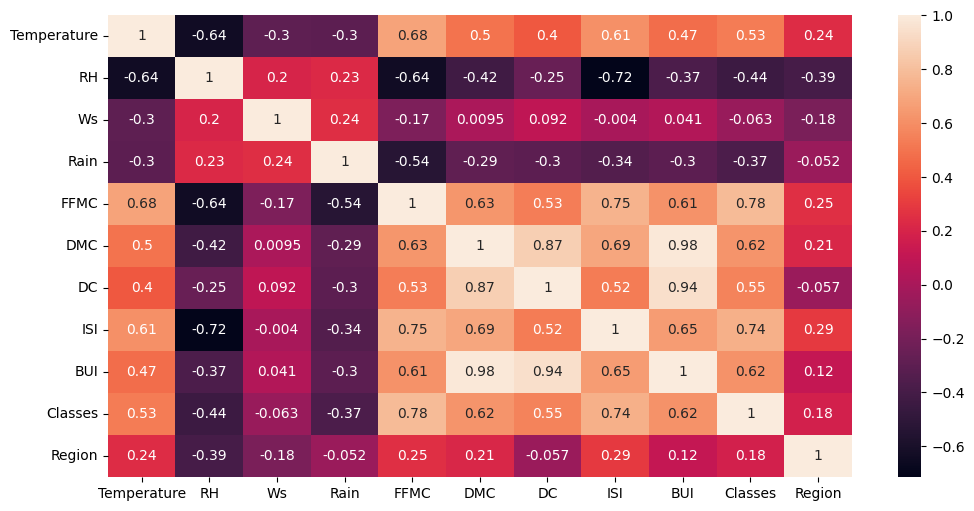

In [28]:
## Check for Multicolinearity

plt.figure(figsize=(12,6))
corr = X_train.corr()
sns.heatmap(corr,annot = True)

In [29]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [34]:
## Threshould -- domain expretise
corr_features = correlation(X_train,0.85)

In [36]:
## drop features when correlation is more than 0.85

X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape


((170, 9), (73, 9))

 Feature Scaling or Standardization

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

Box Plots to understand effect of standard scaler

Text(0.5, 1.0, 'X_train after scaling')

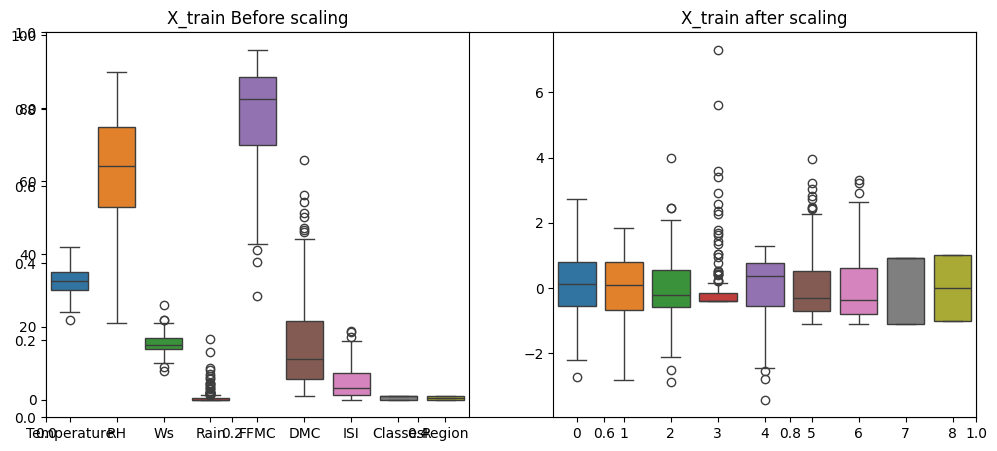

In [41]:
plt.subplots(figsize = (12,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title('X_train Before scaling')
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scale)
plt.title('X_train after scaling')


#### Linear Rgression Model

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
linearregression = LinearRegression()

In [44]:
linearregression.fit(X_train_scale,y_train)

LinearRegression()

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [52]:
y_pred = linearregression.predict(X_test_scale)

In [53]:
mse = mean_squared_error(y_test,y_pred)

In [54]:
mae = mean_absolute_error(y_test,y_pred)

In [55]:
score = r2_score(y_test,y_pred)

0.6829306792403725
0.5648036371485072
0.9847206874554418


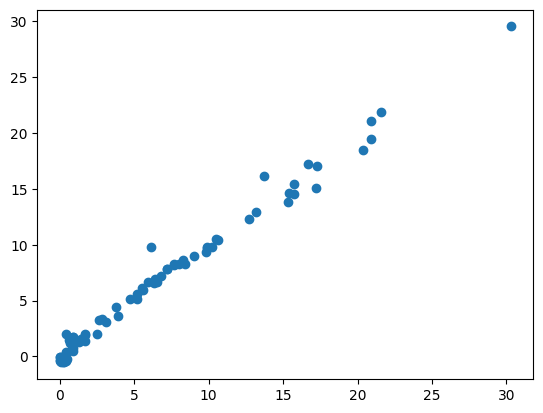

In [57]:
print(mse)
print(mae)
print(score)
plt.scatter(y_test,y_pred)

### Lasso Regression

In [61]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scale,y_train)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
y_pred = lasso.predict(X_test_scale)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

1.1203368882393199
0.9511364350928344


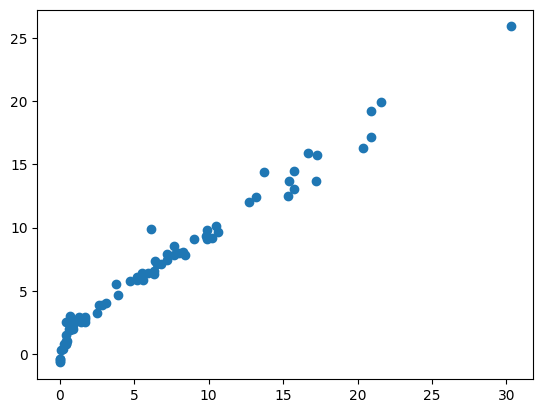

In [63]:
print(mae)
print(score)
plt.scatter(y_test,y_pred)

Ridge regression

In [64]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scale,y_train)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
y_pred = ridge.predict(X_test_scale)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

0.5844876727578021
0.9841610358272456


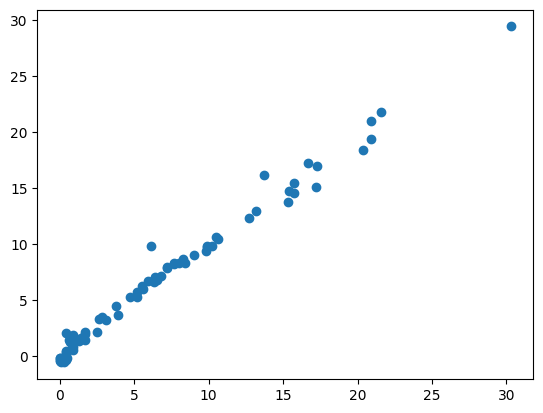

In [65]:
print(mae)
print(score)
plt.scatter(y_test,y_pred)

1.8554687479717549
0.8804077479376988


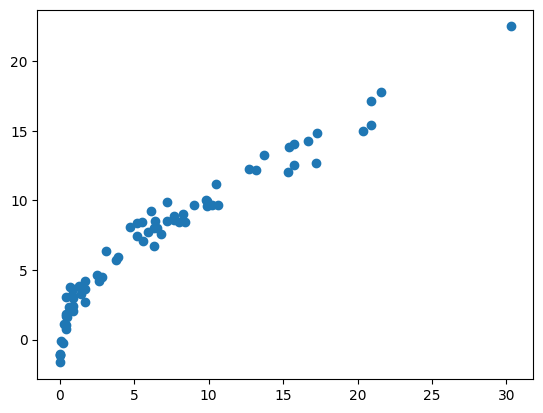

In [66]:
from sklearn.linear_model import ElasticNet
elastice = ElasticNet()
elastice.fit(X_train_scale,y_train)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
y_pred = elastice.predict(X_test_scale)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(mae)
print(score)
plt.scatter(y_test,y_pred)

### Hyper Parameter Tunning

In [69]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scale,y_train)

LassoCV(cv=5)

In [70]:
lassocv.predict(X_test_scale)

array([ 8.16397207,  7.67804744, -0.25189771,  4.77987505,  6.78091283,
        1.81614639,  2.22578301,  7.63488733,  2.02410339,  3.44451117,
        0.66242944,  9.99905308,  9.35795141, 16.96297721, 18.25149952,
        1.66970735,  1.61943284, -0.74666772,  7.27602907,  3.10770548,
        2.01253998,  0.16535072,  6.47186084,  0.12797246, 20.96857542,
        5.11509091,  5.85109963,  9.74520405, -0.89721414,  9.90860031,
        6.7060563 , -0.30293842, 10.29361523, 14.41049039,  1.76750782,
        0.88833515,  2.01997732,  5.96647081, -0.68302491, -0.62508115,
        6.45233271,  2.14437167,  8.46063792, -0.94632281, 15.39177571,
        8.31767104,  8.47395999,  1.44833946, 13.01341005,  1.22369685,
       29.03757686,  5.49338626, 17.13273437, 19.25389134, 13.68892486,
       16.02178729,  1.0354206 ,  9.07993294,  3.8419495 , 14.42765364,
        5.22475186,  1.16678645, -0.43979232, 21.8126402 ,  3.43931301,
        1.79083669,  9.64615263,  6.96670663, 10.28790792, -0.86

In [71]:
lassocv.alpha_

np.float64(0.06177603120682054)

In [72]:
lassocv.alphas_

array([7.1027424 , 6.62404134, 6.17760312, 5.76125335, 5.37296415,
       5.01084435, 4.67313021, 4.35817688, 4.06445034, 3.79051999,
       3.53505163, 3.29680098, 3.07460763, 2.86738937, 2.67413692,
       2.49390904, 2.32582792, 2.1690749 , 2.02288651, 1.88655073,
       1.75940353, 1.64082562, 1.53023946, 1.42710644, 1.33092425,
       1.24122441, 1.15757004, 1.07955369, 1.00679538, 0.93894074,
       0.87565928, 0.81664278, 0.76160379, 0.71027424, 0.66240413,
       0.61776031, 0.57612533, 0.53729642, 0.50108444, 0.46731302,
       0.43581769, 0.40644503, 0.379052  , 0.35350516, 0.3296801 ,
       0.30746076, 0.28673894, 0.26741369, 0.2493909 , 0.23258279,
       0.21690749, 0.20228865, 0.18865507, 0.17594035, 0.16408256,
       0.15302395, 0.14271064, 0.13309242, 0.12412244, 0.115757  ,
       0.10795537, 0.10067954, 0.09389407, 0.08756593, 0.08166428,
       0.07616038, 0.07102742, 0.06624041, 0.06177603, 0.05761253,
       0.05372964, 0.05010844, 0.0467313 , 0.04358177, 0.04064

In [73]:
lassocv.mse_path_

array([[50.65386968, 76.54197718, 42.60540011, 85.19903601, 37.22447771],
       [44.75111814, 74.82132255, 38.341692  , 85.19903601, 33.05643554],
       [39.36934038, 67.35349762, 32.91718118, 77.16947646, 28.98441557],
       [34.66809152, 60.76849885, 28.30179163, 70.00628728, 25.07891899],
       [30.56005987, 54.39656706, 24.38332378, 63.69553448, 21.70030699],
       [26.96916466, 47.86216351, 21.06462063, 58.13161794, 18.77862509],
       [23.82945553, 42.15575307, 18.26138649, 53.22232605, 16.25301222],
       [21.08318369, 37.17090521, 15.90095328, 46.89293347, 14.07124316],
       [18.68014904, 32.81473426, 13.92043855, 41.32635877, 12.18732916],
       [16.57661964, 29.00744813, 12.26540003, 36.4658746 , 10.56155236],
       [14.73438066, 25.67846082, 10.88893934, 32.22081976,  9.15943046],
       [13.12047322, 22.76665973,  9.75047302, 28.5122238 ,  7.95103045],
       [11.70583482, 20.21881242,  8.81511714, 25.27132199,  6.9102242 ],
       [10.46524798, 17.98854548,  8.0

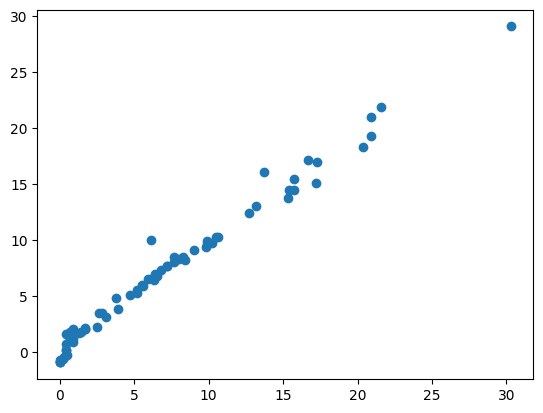

In [75]:
y_pred = lassocv.predict(X_test_scale)

plt.scatter(y_test,y_pred)

0.635601574451742
0.9821627684487946


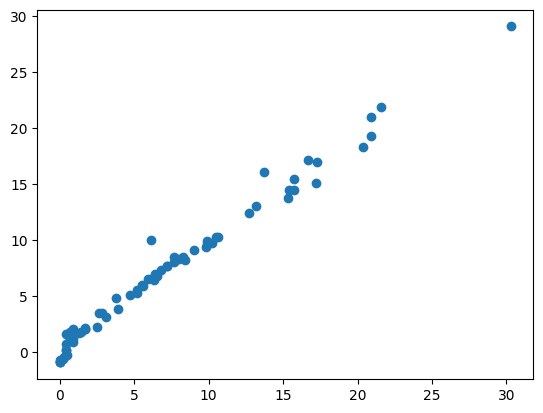

In [76]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(mae)
print(score)
plt.scatter(y_test,y_pred)

#### Ridge regression with cv

In [78]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(cv=5)

1.8554687479717549
0.8804077479376988


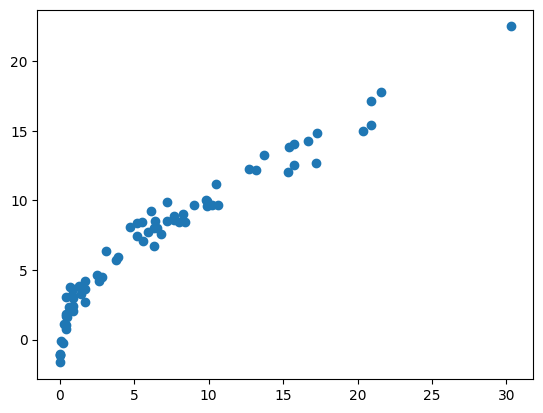

In [80]:
ridgecv.fit(X_train_scale,y_train)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
y_pred = ridgecv.predict(X_test_scale)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(mae)
print(score)
plt.scatter(y_test,y_pred)

Elastic net Cross Validation

0.6856401038998683
0.9807402447693789


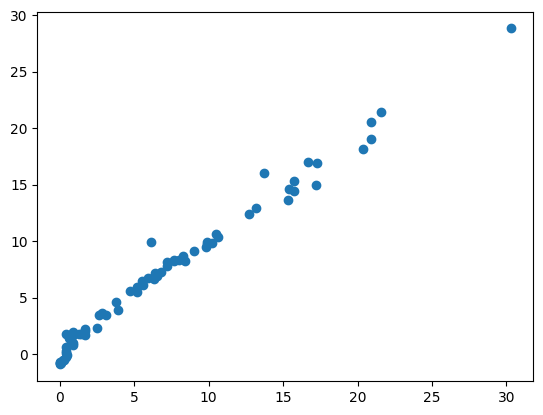

In [82]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv = ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scale,y_train)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
y_pred = elasticnetcv.predict(X_test_scale)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(mae)
print(score)
plt.scatter(y_test,y_pred)

Pickle the machine learning modesl,preprocessing model standard scaler

In [85]:
scaler

StandardScaler()

In [86]:
ridge

Ridge()

In [87]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))

pickle.dump(ridge,open('ridge.pkl','wb'))